# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*

*Daniel Bicák bicakd@natur.cuni.cz*

# Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data

In [2]:
# seaborn provides built in datasets. We can list all available. 

datasets = sns.get_dataset_names()
datasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# load  dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plots

### Displot

https://seaborn.pydata.org/generated/seaborn.displot.html

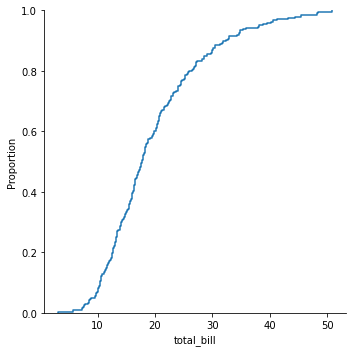

In [11]:
sns.displot(tips['total_bill'], kind='ecdf')

### Jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

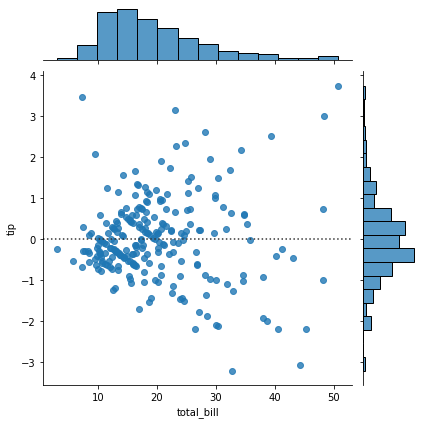

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='resid')

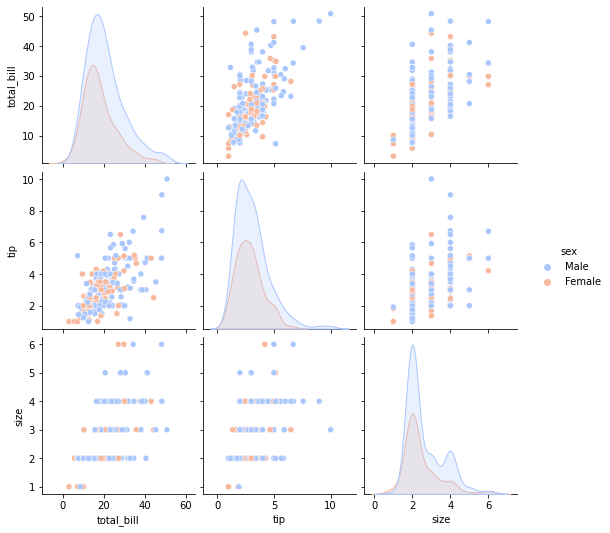

In [13]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## Categorical Data Plots


There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

### barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

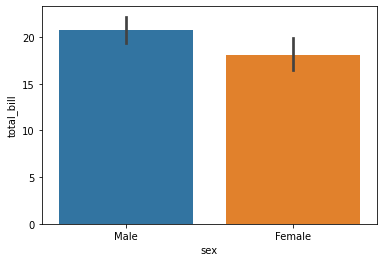

In [17]:
sns.barplot(x='sex',y='total_bill',data=tips)

### boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

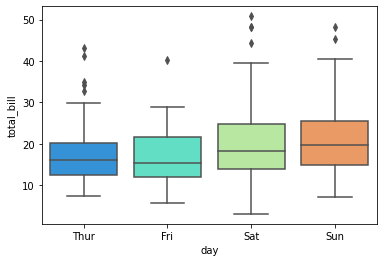

In [18]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

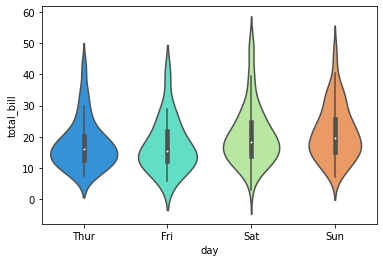

In [19]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

### stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

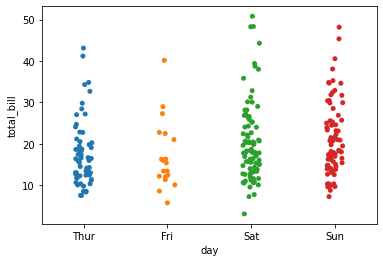

In [20]:
sns.stripplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

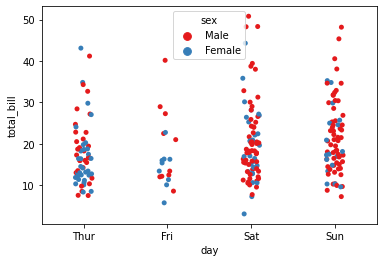

In [21]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

## Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices.

In [22]:
# heatmap is useful for visual exploration of data

correlation = tips.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

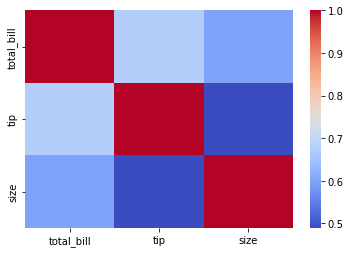

In [23]:
sns.heatmap(correlation,cmap='coolwarm',annot=False)

## Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

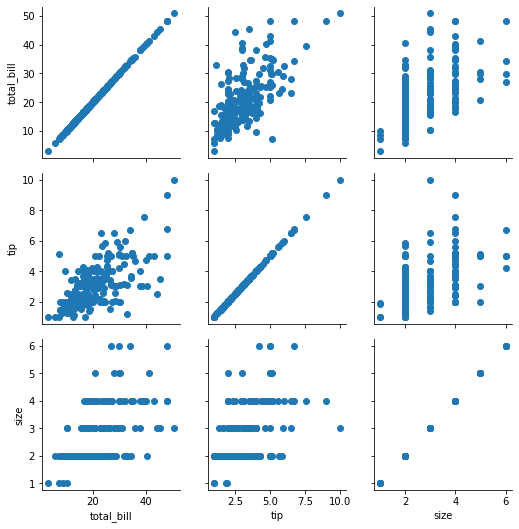

In [24]:
g = sns.PairGrid(tips)
g.map(plt.scatter)

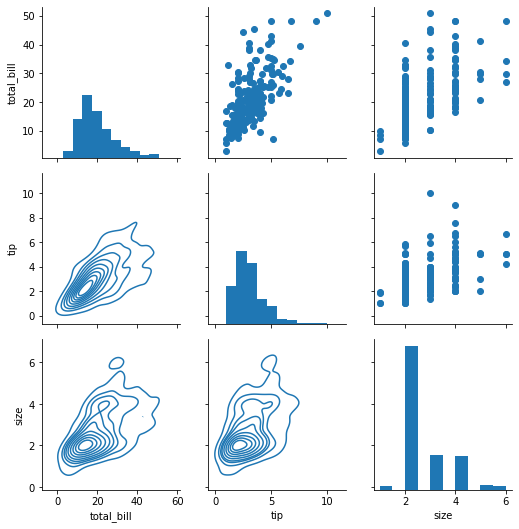

In [25]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

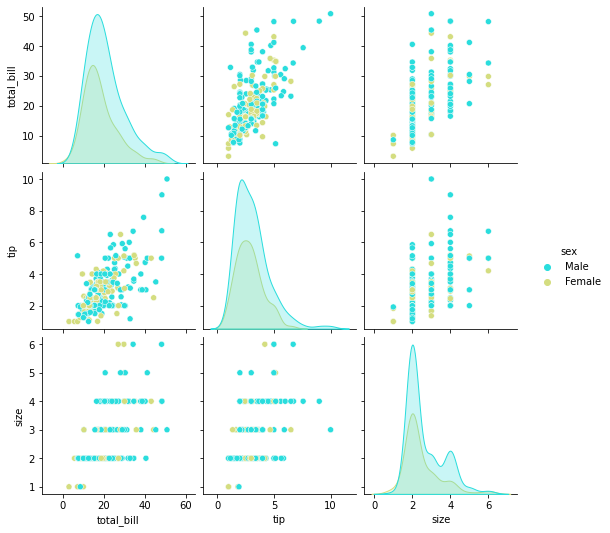

In [26]:
sns.pairplot(tips ,hue='sex',palette='rainbow')

### Excersise

Load "titanic" dataset and using visual exploration try to find out, which passangers have had highest chance to survive! 


In [27]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='pclass', ylabel='age'>

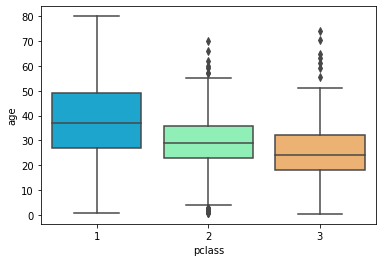

In [34]:
sns.boxplot(x="pclass", y="age", data=titanic,palette='rainbow')

<AxesSubplot:>

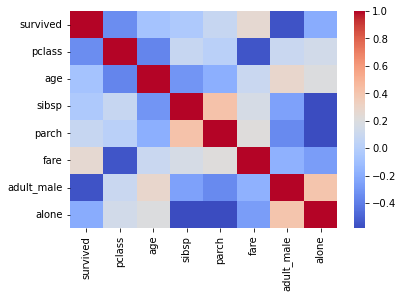

In [35]:
correlation = titanic.corr()
correlation

sns.heatmap(correlation,cmap='coolwarm',annot=False)

<AxesSubplot:>

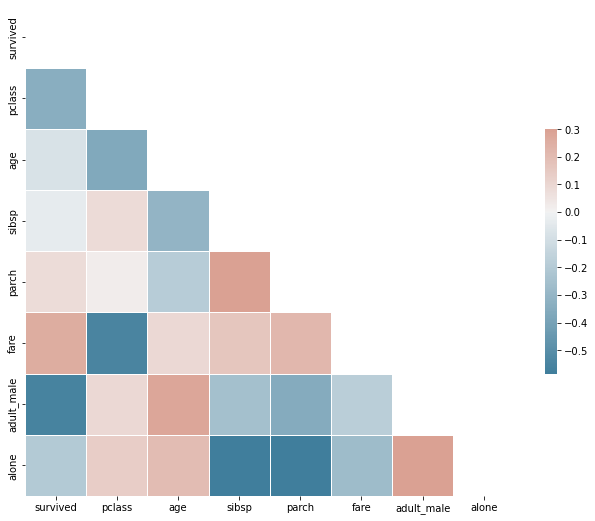

In [36]:
# Compute the correlation matrix
corr =  titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


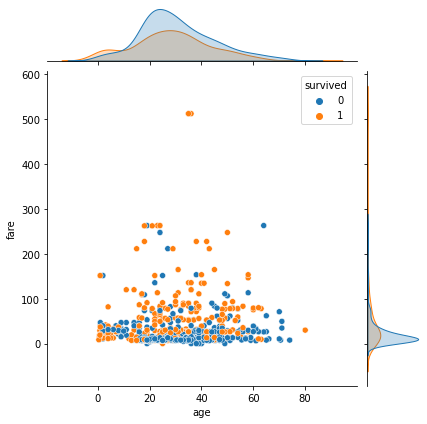

In [40]:
sns.jointplot(x='age',y='fare',data=titanic, hue='survived')

In [44]:
x = np.linspace(0,100,100)
y = x**2

In [63]:
import pandas as pd

a = pd.DataFrame(pd.concat((pd.Series(x), pd.Series(y))))
a.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', length=200)

ValueError: cannot reindex from a duplicate axis

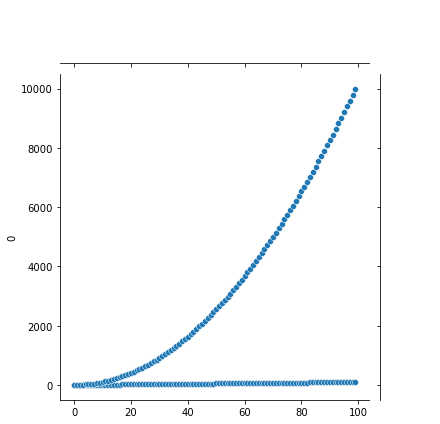

In [67]:
sns.jointplot(x=a.index,y=a[0],data=a)

In [62]:
a

,0
0,0.000000
1,1.010101
2,2.020202
3,3.030303
4,4.040404
...,...
95,95.959596
96,96.969697
97,97.979798
98,98.989899
